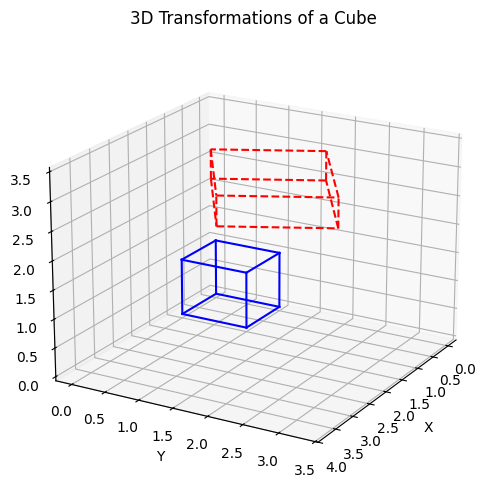

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

def make_unit_cube():
    pts = np.array([
        [0, 0, 0, 1],
        [1, 0, 0, 1],
        [1, 1, 0, 1],
        [0, 1, 0, 1],
        [0, 0, 1, 1],
        [1, 0, 1, 1],
        [1, 1, 1, 1],
        [0, 1, 1, 1]
    ]).T
    return pts

def plot_cube(ax, pts, style='b-'):
    edges = [
        (0, 1), (1, 2), (2, 3), (3, 0),
        (4, 5), (5, 6), (6, 7), (7, 4),
        (0, 4), (1, 5), (2, 6), (3, 7)
    ]
    xs, ys, zs = pts[0], pts[1], pts[2]
    for i, j in edges:
        ax.plot([xs[i], xs[j]],
                [ys[i], ys[j]],
                [zs[i], zs[j]],
                style)

def transform_points(pts, M):
    """Apply a 4x4 transformation matrix to homogeneous points."""
    return M @ pts

def example_3d_transform():
    cube = make_unit_cube()

    # Scaling matrix
    S = np.array([
        [2, 0, 0, 0],
        [0, 1.5, 0, 0],
        [0, 0, 0.5, 0],
        [0, 0, 0, 1]
    ])

    # Translation matrix
    T = np.array([
        [1, 0, 0, 2],
        [0, 1, 0, 1],
        [0, 0, 1, 3],
        [0, 0, 0, 1]
    ])

    # Rotation about Z-axis
    theta = np.pi / 6
    Rz = np.array([
        [np.cos(theta), -np.sin(theta), 0, 0],
        [np.sin(theta),  np.cos(theta), 0, 0],
        [0,              0,             1, 0],
        [0,              0,             0, 1]
    ])

    # Combined transformation: Scale -> Rotate -> Translate
    M = T @ Rz @ S
    cube_t = transform_points(cube, M)

    # Plotting
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    plot_cube(ax, cube, style='b-')      # Original cube in blue
    plot_cube(ax, cube_t, style='r--')   # Transformed cube in red dashed
    ax.set_title("3D Transformations of a Cube")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.view_init(elev=20, azim=30)
    plt.show()

# Run example
example_3d_transform()


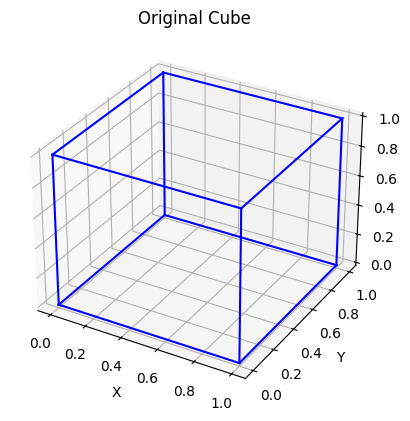

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

cube_vertices = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [1, 1, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 1],
    [1, 1, 1],
    [0, 1, 1]
])

edges = [
    [0,1],[1,2],[2,3],[3,0],  
    [4,5],[5,6],[6,7],[7,4],  
    [0,4],[1,5],[2,6],[3,7]   
]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for edge in edges:
    ax.plot(cube_vertices[edge,0], cube_vertices[edge,1], cube_vertices[edge,2], 'b')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Original Cube')
plt.show()


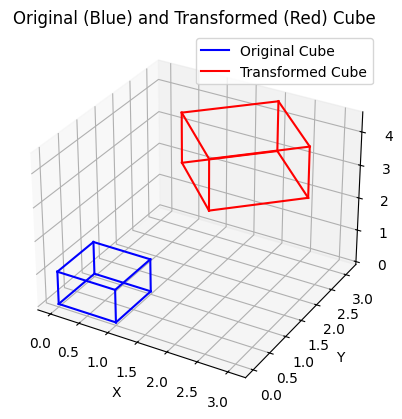

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

cube_vertices = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [1, 1, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 1],
    [1, 1, 1],
    [0, 1, 1]
])

edges = [
    [0,1],[1,2],[2,3],[3,0],  
    [4,5],[5,6],[6,7],[7,4],  
    [0,4],[1,5],[2,6],[3,7]   
]

# Transformation matrices
scale_factor = 1.5
S = np.diag([scale_factor, scale_factor, scale_factor])

theta = np.pi / 4  
Rz = np.array([
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta),  np.cos(theta), 0],
    [0, 0, 1]
])

T = np.array([2, 1, 3])  

# Apply transformations: scale -> rotate -> translate
transformed_vertices = cube_vertices @ S.T
transformed_vertices = transformed_vertices @ Rz.T
transformed_vertices = transformed_vertices + T

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot original cube (blue)
for i, edge in enumerate(edges):
    if i == 0:
        ax.plot(cube_vertices[edge,0], cube_vertices[edge,1], cube_vertices[edge,2], 'b', label='Original Cube')
    else:
        ax.plot(cube_vertices[edge,0], cube_vertices[edge,1], cube_vertices[edge,2], 'b')

# Plot transformed cube (red)
for i, edge in enumerate(edges):
    if i == 0:
        ax.plot(transformed_vertices[edge,0], transformed_vertices[edge,1], transformed_vertices[edge,2], 'r', label='Transformed Cube')
    else:
        ax.plot(transformed_vertices[edge,0], transformed_vertices[edge,1], transformed_vertices[edge,2], 'r')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Original (Blue) and Transformed (Red) Cube')
ax.legend()
plt.show()


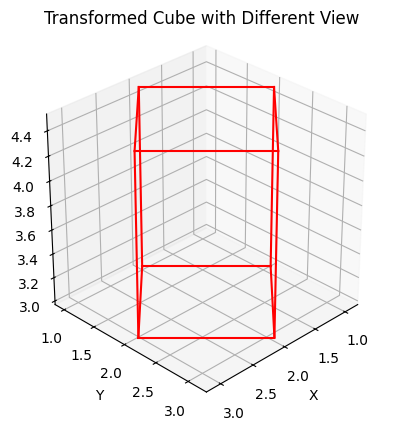

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot transformed cube (red)
for edge in edges:
    ax.plot(transformed_vertices[edge,0],
            transformed_vertices[edge,1],
            transformed_vertices[edge,2], 'r')

# Optional: equal aspect ratio for X, Y, Z
ax.set_box_aspect([1,1,1])

ax.view_init(elev=30, azim=45)  
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Transformed Cube with Different View')
plt.show()
